# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [DAVID MARIO YOHANES SAMOSIR]
- **Email:** [david.mario@undiksha.ac.id]
- **ID Dicoding:** [davidmarioys]

## Menentukan Pertanyaan Bisnis

- Berapa persentase dari penggunaan sepeda pada hari kerja dan libur?
- Bagaimana cuaca dan musim mempengaruhi preferensi peminjaman sepeda pada hari kerja dan libur?
- Berapa persentase kenaikan atau penurunan dari penggunaan sepeda berdasarkan peminjam yang terdaftar dan tidak terdaftar setiap bulannya.

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Membaca file dengan format `.csv`
- Menampilkan bagian awal dengan perintah `.head`

In [2]:
# Membaca file day.csv
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

- Mengecek data yang tidak lengkap dengan perintah `.isna().sum()`
- Mengecek data invalid dengan `.info()`
- Mengecek data duplikat dengan perintah `.duplicated().sum()`

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

- Melakukan pembersihan data dengan perintah `drop` pada data bias

In [6]:
day_df.drop_duplicates(inplace=True)

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df[day_df.isna()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

### Explore Data day_df
- Mengelompokan data berdasarkan data `season` terhadap jumlah pengguna dan cuaca
- Mengelompokan berdasarkan data `holiday` terhadap jumlah pengguna
- Mengelompokan berdasarkan data `workingday` terhadap jumlah pengguna
- Mengelompokan berdasarkan data `weathersit` terhadap jumlah pengguna
- Mengelompokan berdasarkan data `mnth` terhadap jumlah pengguna terdaftar dan tidak terdaftar

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
day_df.groupby(by="season").cnt.count().rename({1: '1. Spring', 2: '2. Summer', 3: '3. Fall', 4: '4. Winter'})

season
1. Spring    181
2. Summer    184
3. Fall      188
4. Winter    178
Name: cnt, dtype: int64

In [11]:
# Groupby Musim Berdasarkan Keadaan Cuaca
seasonal_analysis = day_df.groupby(by="season").agg({
    "cnt": ["mean", "std"],
    "temp": ["mean", "std"],
    "hum": ["mean", "std"],
    "windspeed": ["mean", "std"]
}).reset_index()

print(seasonal_analysis)

  season          cnt                   temp                 hum            \
                 mean          std      mean       std      mean       std   
0      1  2604.132597  1399.942119  0.297748  0.102735  0.582903  0.151880   
1      2  4992.331522  1695.977235  0.544405  0.122650  0.626948  0.152841   
2      3  5644.303191  1459.800381  0.706309  0.070848  0.633482  0.119349   
3      4  4728.162921  1699.615261  0.422906  0.107834  0.668719  0.131248   

  windspeed            
       mean       std  
0  0.214537  0.086439  
1  0.203507  0.071629  
2  0.172095  0.059526  
3  0.171995  0.081565  


In [12]:
day_df.groupby(by="holiday").cnt.count()

holiday
0    710
1     21
Name: cnt, dtype: int64

In [13]:
# Groupby Hari Libur
holiday_analysis = day_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()

print(holiday_analysis)

  holiday   cnt                                
            max   min         mean          std
0       0  8714    22  4527.104225  1929.013947
1       1  7403  1000  3735.000000  2103.350660


In [14]:
day_df.groupby(by="workingday").cnt.count()

workingday
0    231
1    500
Name: cnt, dtype: int64

In [15]:
# Groupby Hari Kerja
workday_analysis = day_df.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std"]
}).reset_index()

print(workday_analysis)

  workingday   cnt                               
               max  min         mean          std
0          0  8714  605  4330.168831  2052.141245
1          1  8362   22  4584.820000  1878.415583


In [16]:
day_df.groupby(by="weathersit").cnt.sum().rename({1: '1. Cerah', 2: '2. Mendung', 3: '3. Hujan'})

weathersit
1. Cerah      2257952
2. Mendung     996858
3. Hujan        37869
Name: cnt, dtype: int64

In [17]:
# Groupby Cuaca
holiday_analysis = day_df.groupby(by="weathersit").agg({
    "cnt": ["mean", "std"],
    "temp": ["mean", "std"],
    "hum": ["mean", "std"],
    "windspeed": ["mean", "std"]
}).reset_index()

print(holiday_analysis)

  weathersit          cnt                   temp                 hum  \
                     mean          std      mean       std      mean   
0          1  4876.786177  1879.483989  0.511541  0.191165  0.565594   
1          2  4035.862348  1809.109918  0.470366  0.167180  0.725887   
2          3  1803.285714  1240.284449  0.433440  0.131473  0.848872   

            windspeed            
        std      mean       std  
0  0.112472  0.190253  0.077530  
1  0.109648  0.186431  0.075331  
2  0.201572  0.243336  0.086185  


In [18]:
day_df.groupby(by="mnth").cnt.count().rename({1: '1. Januari', 2: '2. Februari', 3: '3. Maret', 4: '4. April', 5: '5. Mei', 6: '6. Juni', 7: '7. Juli', 8: '8. Agustus', 9: '9. September', 10: '10. Oktober', 11: '11. November', 12: 'Desember'})

mnth
1. Januari      62
2. Februari     57
3. Maret        62
4. April        60
5. Mei          62
6. Juni         60
7. Juli         62
8. Agustus      62
9. September    60
10. Oktober     62
11. November    60
Desember        62
Name: cnt, dtype: int64

In [19]:
# Groupby Bulan
month_analysis = day_df.groupby(by="mnth").agg({
    "casual": ["max", "min", "sum", "mean", "std"]
}).reset_index()

print(month_analysis)

   mnth casual                                     
           max  min    sum         mean         std
0     1   1070    9  12042   194.225806  197.384490
1     2   1435   47  14963   262.508772  232.283549
2     3   3155   46  44444   716.838710  624.308094
3     4   3252  120  60802  1013.366667  738.345585
4     5   3410  255  75285  1214.274194  754.950311
5     6   2963  477  73906  1231.766667  664.017647
6     7   3065  562  78157  1260.596774  598.382778
7     8   2827  226  72039  1161.919355  466.576274
8     9   3160  118  70323  1172.050000  738.378375
9    10   3031    2  59760   963.870968  703.205576
10   11   2290   69  36603   610.050000  470.933096
11   12   1153    9  21693   349.887097  222.634531


In [20]:
# Groupby Bulan
month_analysis = day_df.groupby(by="mnth").agg({
    "registered": ["max", "min", "sum", "mean", "std"]
}).reset_index()

print(month_analysis)

   mnth registered                                        
               max   min     sum         mean          std
0     1       4185   416  122891  1982.112903  1053.274474
1     2       4546   905  136389  2392.789474  1091.126003
2     3       5893   491  184476  2975.419355  1513.254354
3     4       5950   674  208292  3471.533333  1414.571151
4     5       6433  2213  256401  4135.500000  1093.179612
5     6       6456  2993  272436  4540.600000  1012.958885
6     7       6790  2298  266791  4303.080645  1190.542490
7     8       6541   889  279155  4502.500000  1335.126601
8     9       6946  1689  275668  4594.466667  1547.716749
9    10       6911    20  262592  4235.354839  1685.022519
10   11       5520   935  218228  3637.133333  1219.589045
11   12       6055   432  189343  3053.919355  1465.052959


## Visualization & Explanatory Analysis

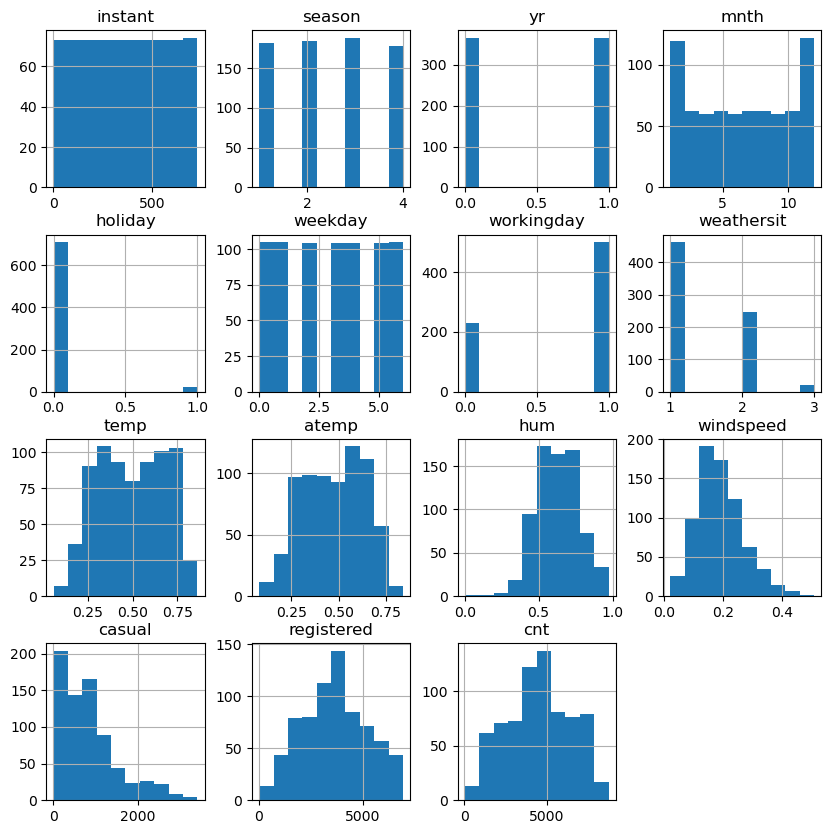

In [21]:
# Visualisasi setiap data dari file day.csv
day_df.hist(figsize=(10, 10))
plt.show()

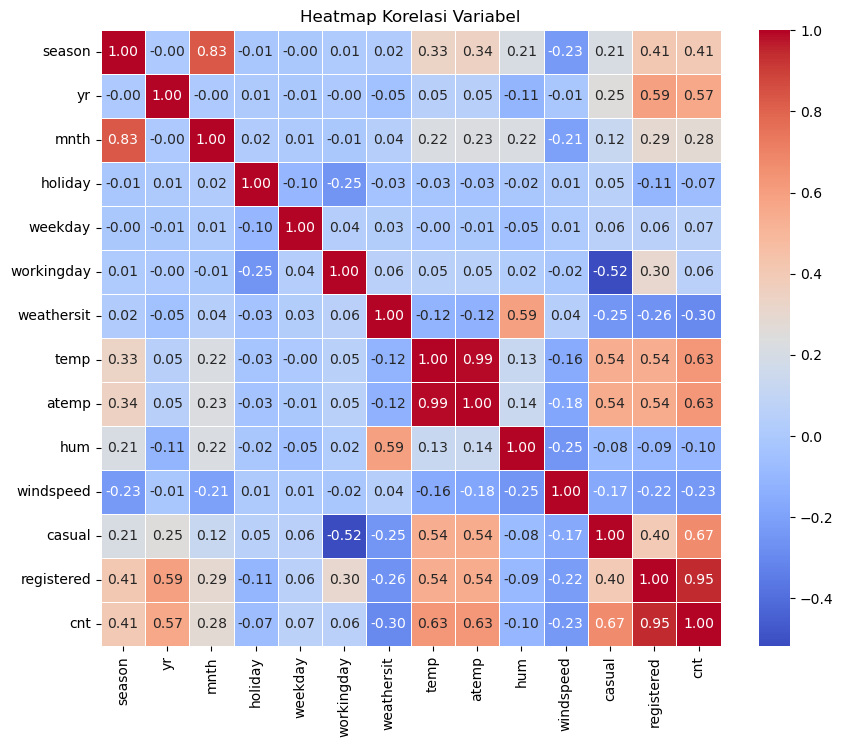

In [22]:
# Membuat DataFrame untuk heatmap
heatmap_data = day_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# Menghitung korelasi antar kolom
correlation_matrix = heatmap_data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Variabel')
plt.show()

### Pertanyaan 1: Berapa persentase dari penggunaan sepeda pada hari kerja dan libur?

In [23]:
# Total peminjaman pada hari libur
total_rental_holiday = day_df.groupby(by="holiday").cnt.sum()
print(total_rental_holiday)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


In [24]:
# Total peminjaman pada hari kerja
total_rental_workday = day_df.groupby(by="workingday").cnt.sum()
print(total_rental_workday)

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


In [25]:
# Visualisasi perbandingan
labels = ['Hari Libur', 'Hari Kerja']
values_holiday = total_rental_holiday.values
values_workday = total_rental_workday.values

In [26]:
# Warna untuk pie chart
colors_holiday = ['yellow', 'blue']
colors_workday = ['yellow', 'blue']

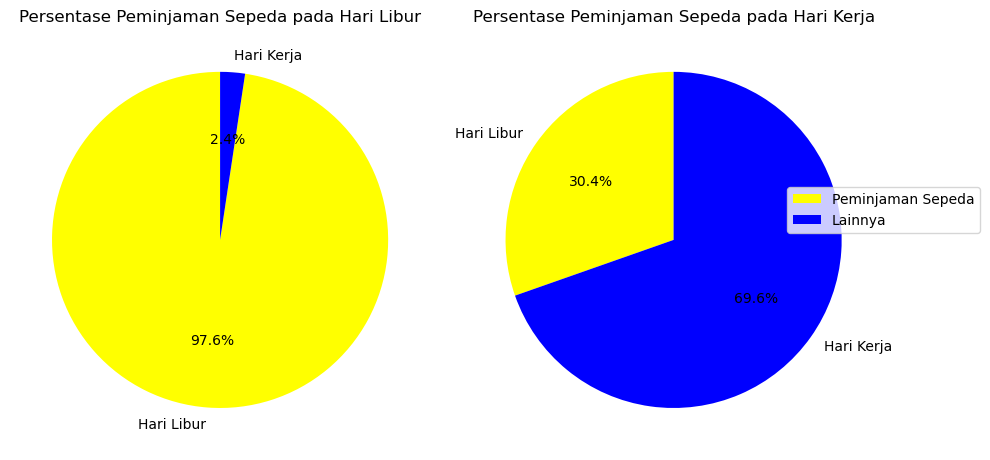

In [27]:
plt.figure(figsize=(10, 6))

# Visualisasi Pie Chart Hari Libur
plt.subplot(1, 2, 1)
plt.pie(values_holiday, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_holiday)
plt.title('Persentase Peminjaman Sepeda pada Hari Libur')

# Visualisasi Pie Chart Hari Kerja
plt.subplot(1, 2, 2)
plt.pie(values_workday, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors_workday)
plt.title('Persentase Peminjaman Sepeda pada Hari Kerja')

# Keterangan warna
legend_labels = ['Peminjaman Sepeda', 'Lainnya']
plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(1, 0.5))

# Layout Subplot yang Rapi
plt.tight_layout()
plt.show()

In [28]:
print("Hari Libur:")
print("- 97.6% peminjaman sepeda pada hari libur terkonsentrasi pada Peminjaman Sepeda")
print("- Hanya 2.4% peminjaman sepeda pada hari libur yang termasuk dalam kategori Lainnya\n")
print("Hari Kerja:")
print("- 30.4% peminjaman sepeda pada hari kerja terkonsentrasi pada Peminjaman Sepeda")
print("- 69.6% peminjaman sepeda pada hari kerja termasuk dalam kategori Lainnya")

Hari Libur:
- 97.6% peminjaman sepeda pada hari libur terkonsentrasi pada Peminjaman Sepeda
- Hanya 2.4% peminjaman sepeda pada hari libur yang termasuk dalam kategori Lainnya

Hari Kerja:
- 30.4% peminjaman sepeda pada hari kerja terkonsentrasi pada Peminjaman Sepeda
- 69.6% peminjaman sepeda pada hari kerja termasuk dalam kategori Lainnya


### Pertanyaan 2: Bagaimana cuaca dan musim mempengaruhi preferensi peminjaman sepeda pada hari kerja dan libur?

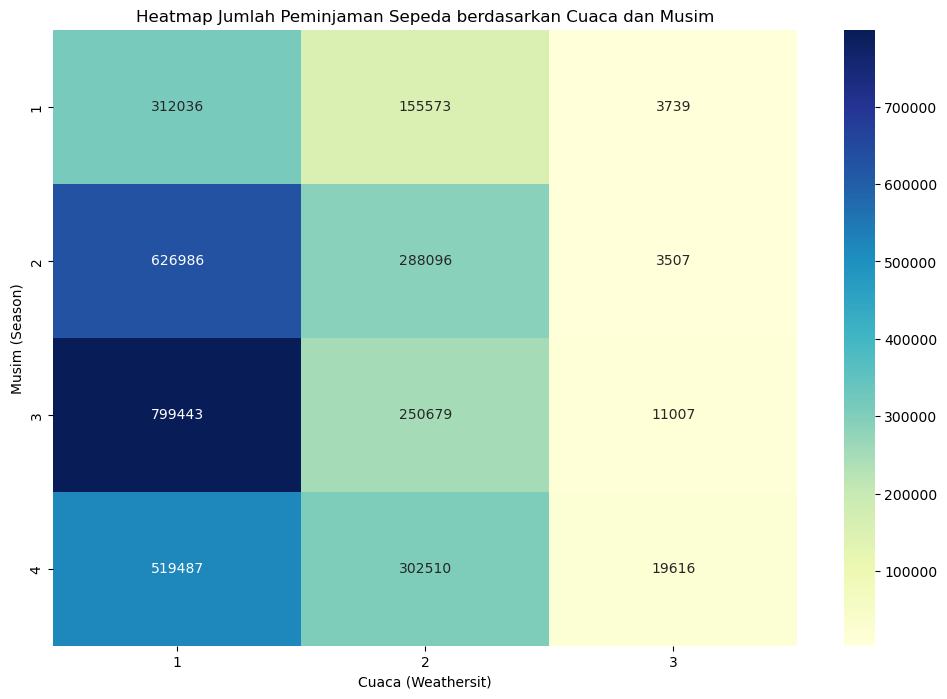

In [42]:
plt.figure(figsize=(12, 8))
heatmap_data = day_df.pivot_table(index='season', columns='weathersit', values='cnt', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap Jumlah Peminjaman Sepeda berdasarkan Cuaca dan Musim')
plt.xlabel('Cuaca (Weathersit)')
plt.ylabel('Musim (Season)')
plt.show()

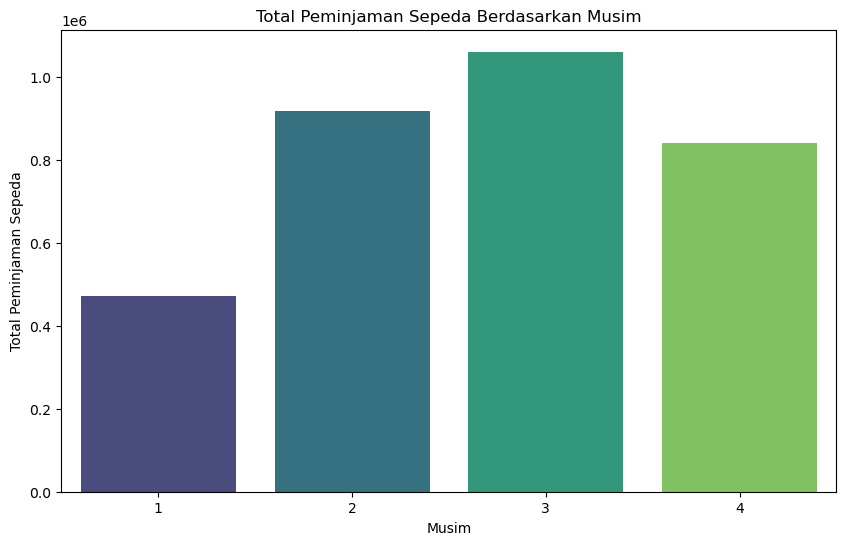

In [29]:
# Membuat DataFrame untuk visualisasi
season_data = day_df[['season', 'casual', 'registered', 'cnt']]

# Menghitung total peminjaman untuk setiap musim
season_total = season_data.groupby('season').sum()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=season_total.index, y='cnt', data=season_total, palette='viridis')
plt.title('Total Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman Sepeda')
plt.show()

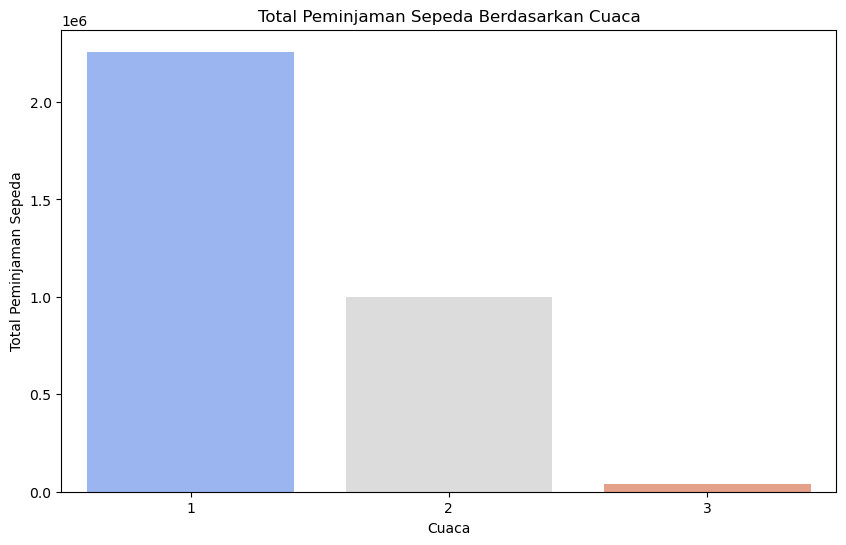

In [30]:
# Membuat DataFrame untuk visualisasi
weather_data = day_df[['weathersit', 'casual', 'registered', 'cnt']]

# Menghitung total peminjaman untuk setiap jenis cuaca
weather_total = weather_data.groupby('weathersit').sum()

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_total.index, y='cnt', data=weather_total, palette='coolwarm')
plt.title('Total Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Total Peminjaman Sepeda')
plt.show()

C:\Users\David Mario Yohanes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

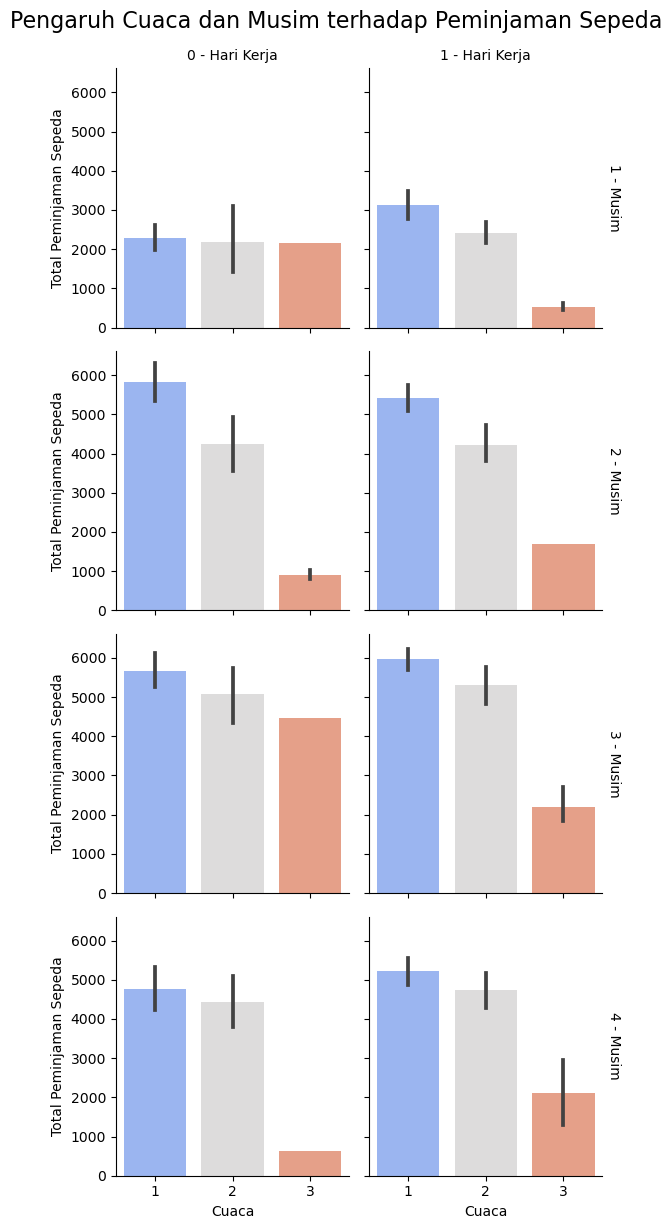

In [38]:
# Membuat DataFrame untuk visualisasi
combined_data = day_df[['season', 'weathersit', 'workingday', 'cnt']]

# Mendefinisikan urutan cuaca untuk memastikan plot yang benar
weather_order = [1, 2, 3]

# Membuat bar plot dengan facet grid
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(combined_data, col='workingday', row='season', margin_titles=True)
g.map(sns.barplot, 'weathersit', 'cnt', order=weather_order, palette='coolwarm')

# Menyesuaikan tata letak dan judul
g.set_axis_labels('Cuaca', 'Total Peminjaman Sepeda')
g.set_titles(col_template='{col_name} - Hari Kerja', row_template='{row_name} - Musim')
plt.suptitle('Pengaruh Cuaca dan Musim terhadap Peminjaman Sepeda', size=16, y=1.02)

# Menampilkan plot
plt.show()

<Figure size 1600x800 with 0 Axes>

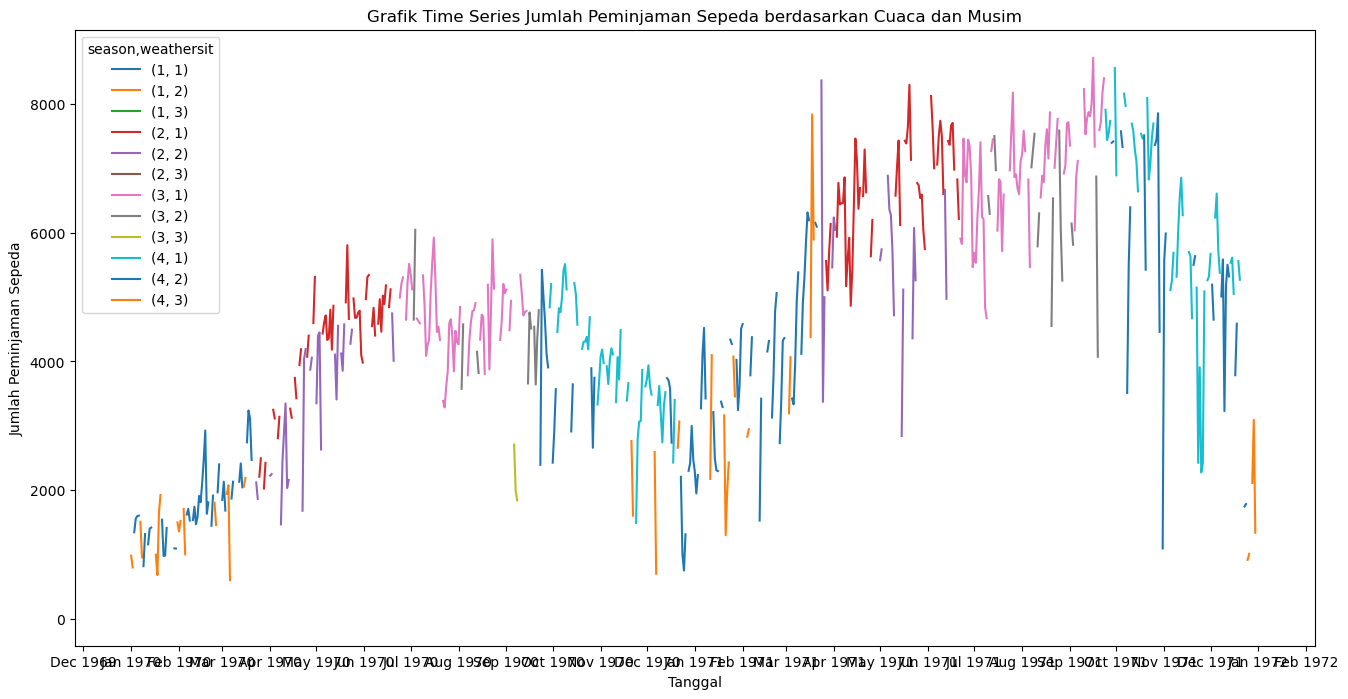

In [46]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 8))
time_series_data = day_df.pivot_table(index='dteday', columns=['season', 'weathersit'], values='cnt', aggfunc='sum')
time_series_data.plot(figsize=(16, 8))
plt.title('Grafik Time Series Jumlah Peminjaman Sepeda berdasarkan Cuaca dan Musim')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

### Pertanyaan 3: Berapa persentase kenaikan atau penurunan dari penggunaan sepeda berdasarkan peminjam yang terdaftar dan tidak terdaftar setiap bulannya.

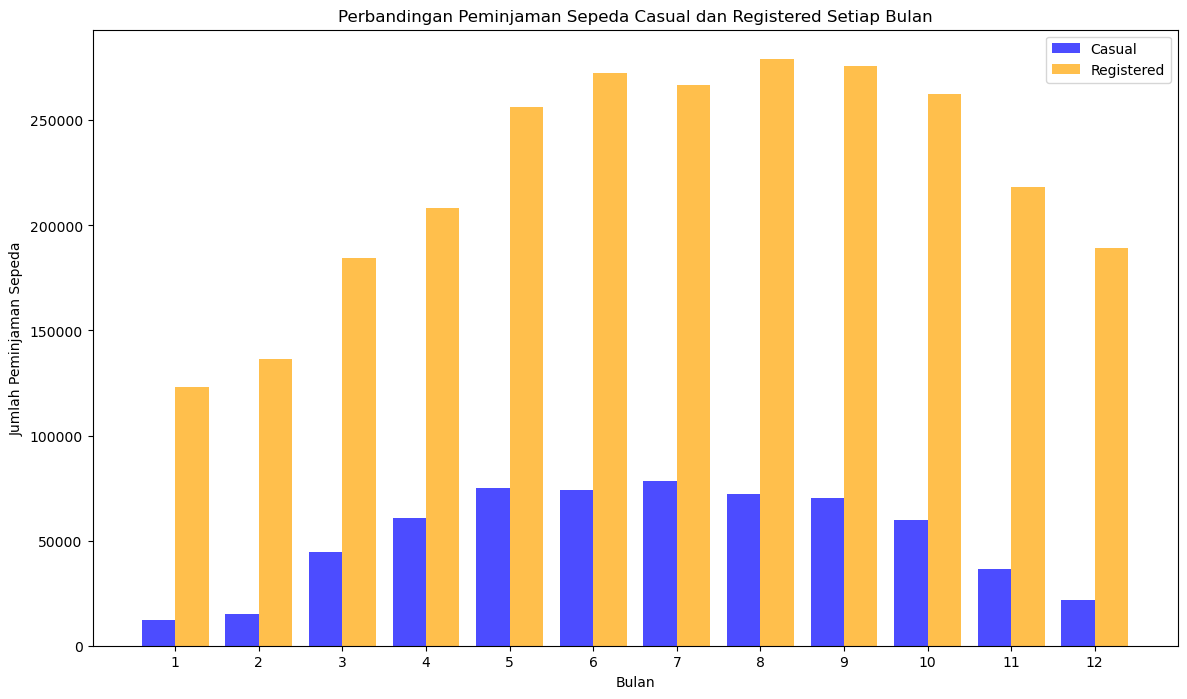

In [72]:
# Membuat dataframe baru yang berisi informasi bulanan
monthly_data = day_df.groupby(['mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Menggambar bar chart untuk perbandingan casual dan registered setiap bulan
plt.figure(figsize=(14, 8))
bar_width = 0.4
bar_positions = range(len(monthly_data))

plt.bar(bar_positions, monthly_data['casual'], width=bar_width, label='Casual', color='blue', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], monthly_data['registered'], width=bar_width, label='Registered', color='orange', alpha=0.7)

plt.title('Perbandingan Peminjaman Sepeda Casual dan Registered Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], monthly_data['mnth'])
plt.legend()

plt.show()

In [81]:
# Membuat dataframe baru yang berisi informasi bulanan
monthly_data = day_df.groupby(['mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Menghitung persentase kenaikan atau penurunan setiap bulan
monthly_data['casual_percentage_change'] = monthly_data['casual'].pct_change() * 100
monthly_data['registered_percentage_change'] = monthly_data['registered'].pct_change() * 100

# Merubah format persentase
monthly_data['casual_percentage_change'] = monthly_data['casual_percentage_change'].map("{:.2f}%".format)
monthly_data['registered_percentage_change'] = monthly_data['registered_percentage_change'].map("{:.2f}%".format)

# Menampilkan hasil
print("Persentase Kenaikan atau Penurunan Penggunaan Sepeda Casual setiap Bulan:")
print(monthly_data[['mnth', 'casual_percentage_change']])

print("\nPersentase Kenaikan atau Penurunan Penggunaan Sepeda Registered setiap Bulan:")
print(monthly_data[['mnth', 'registered_percentage_change']])


Persentase Kenaikan atau Penurunan Penggunaan Sepeda Casual setiap Bulan:
    mnth casual_percentage_change
0      1                     nan%
1      2                   24.26%
2      3                  197.03%
3      4                   36.81%
4      5                   23.82%
5      6                   -1.83%
6      7                    5.75%
7      8                   -7.83%
8      9                   -2.38%
9     10                  -15.02%
10    11                  -38.75%
11    12                  -40.73%

Persentase Kenaikan atau Penurunan Penggunaan Sepeda Registered setiap Bulan:
    mnth registered_percentage_change
0      1                         nan%
1      2                       10.98%
2      3                       35.26%
3      4                       12.91%
4      5                       23.10%
5      6                        6.25%
6      7                       -2.07%
7      8                        4.63%
8      9                       -1.25%
9     10                 

## Conclusion

- Conclution pertanyaan 1 :
>Berdasarkan hasil data yang didapatkan dapat diketahui bahwa pada hari libur, mayoritas peminjaman sepeda terjadi sangat tinggi cenderung dianggap sebagai kegiatan rekreasi atau hobi.
- Conclution pertanyaan 2
> Berdasarkan hasil data yang didapatkan dapat diketahui bahwa cuaca dan musim memiliki peran dalam memengaruhi tingkat peminjaman sepeda. Faktor-faktor ini dapat menjadi pertimbangan penting dalam pengelolaan sistem peminjaman sepeda, dan mungkin dapat digunakan untuk merancang strategi pemasaran atau penyesuaian layanan berdasarkan kondisi cuaca dan musim tertentu.
- Conclution pertanyaan 3
> Berdasarkan hasil data yang didapatkan dapat diketahui bahwa Pengguna casual cenderung mengalami fluktuasi yang lebih besar dari bulan ke bulan, dengan kenaikan dan penurunan yang signifikan, sedangkan pengguna registered, meskipun mengalami variasi, menunjukkan kenaikan yang lebih konsisten dan penurunan yang lebih terbatas dibandingkan pengguna casual.